# Neural Network Classification-------------------------

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:

# Define the path to the file
file_path = '/Users/carlosvelazquez/Desktop/MSBA/Analytical Programming II/Project/nn_3.csv'

# Read the CSV file into a DataFrame
nn_3 = pd.read_csv(file_path)

nn_3

,steam_purchase,recommended,received_for_free,written_during_early_access,discount_percentage,dlc_available,age_rating,win_support,mac_support,linux_support,...,overall_review_%,overall_review_count,original_price_usd,discounted_price_usd,review_length,genre_length,categories_length,developer_mapped,publisherr_mapped,over_50
0,1,1,0,0,59.0,1,0,1,1,1,...,98.0,323872.0,11.52,4.752,52,17,298,4,4,1
1,1,1,0,0,59.0,1,0,1,1,1,...,98.0,323872.0,11.52,4.752,17,17,298,4,4,1
2,1,1,0,0,59.0,1,0,1,1,1,...,98.0,323872.0,11.52,4.752,45,17,298,4,4,1
3,1,1,0,0,59.0,1,0,1,1,1,...,98.0,323872.0,11.52,4.752,5,17,298,4,4,1
4,1,1,0,0,59.0,1,0,1,1,1,...,98.0,323872.0,11.52,4.752,10,17,298,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101432,1,1,0,1,75.0,3,1,1,1,1,...,96.0,15205.0,10.56,2.640,1869,29,334,24,39,1
1101433,1,1,0,0,75.0,3,1,1,1,1,...,96.0,15205.0,10.56,2.640,5928,29,334,24,39,1
1101434,1,1,0,0,75.0,3,1,1,1,1,...,96.0,15205.0,10.56,2.640,59,29,334,24,39,1
1101435,0,1,0,0,75.0,3,1,1,1,1,...,96.0,15205.0,10.56,2.640,39,29,334,24,39,1


In [5]:
steam_purchase_1 = nn_3[nn_3['steam_purchase'] == 1]
steam_purchase_0 = nn_3[nn_3['steam_purchase'] == 0]

# Find the smaller size between the two groups
min_size = min(len(steam_purchase_1), len(steam_purchase_0))

# Sample from each group to ensure 50-50 balance
sample_1 = steam_purchase_1.sample(n=min_size, random_state=42)
sample_0 = steam_purchase_0.sample(n=min_size, random_state=42)

# Combine the samples to form a balanced dataframe
nn_50 = pd.concat([sample_1, sample_0]).sample(frac=1, random_state=42)  # Shuffle the data

# Display the resulting dataframe
print(nn_50)

        steam_purchase  recommended  received_for_free  \
63959                1            1                  0   
971417               0            1                  0   
327090               0            1                  1   
485138               1            1                  0   
828695               0            1                  0   
...                ...          ...                ...   
253190               0            1                  0   
71630                0            1                  0   
422691               1            1                  0   
55514                1            1                  0   
978217               1            1                  0   

        written_during_early_access  discount_percentage  dlc_available  \
63959                             0                 59.0              1   
971417                            0                 75.0             13   
327090                            0                 85.0              2   
485

In [9]:
# Separate X (features) and y (target)
X = nn_3.drop(columns=['steam_purchase']) 
y = nn_3['steam_purchase'] 

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Epoch 1/5


/Users/carlosvelazquez/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16866/16866 ━━━━━━━━━━━━━━━━━━━━ 8s 449us/step - accuracy: 0.7857 - loss: 0.4907 - val_accuracy: 0.7889 - val_loss: 0.4858
Epoch 2/5
16866/16866 ━━━━━━━━━━━━━━━━━━━━ 8s 455us/step - accuracy: 0.7876 - loss: 0.4866 - val_accuracy: 0.7891 - val_loss: 0.4848
Epoch 3/5
16866/16866 ━━━━━━━━━━━━━━━━━━━━ 8s 455us/step - accuracy: 0.7880 - loss: 0.4862 - val_accuracy: 0.7893 - val_loss: 0.4843
Epoch 4/5
16866/16866 ━━━━━━━━━━━━━━━━━━━━ 8s 465us/step - accuracy: 0.7880 - loss: 0.4859 - val_accuracy: 0.7893 - val_loss: 0.4841
Epoch 5/5
16866/16866 ━━━━━━━━━━━━━━━━━━━━ 8s 450us/step - accuracy: 0.7882 - loss: 0.4857 - val_accuracy: 0.7892 - val_loss: 0.4840
10326/10326 ━━━━━━━━━━━━━━━━━━━━ 3s 315us/step - accuracy: 0.7877 - loss: 0.4863
Test Loss: 0.48415321111679077
Test Accuracy: 0.7890700697898865
10326/10326 ━━━━━━━━━━━━━━━━━━━━ 3s 286us/step - accuracy: 0.7877 - loss: 0.4863
Test Loss: 0.48415321111679077
Test Accuracy: 0.7890700697898865
10326/10326 ━━━━━━━━━━━━━━━━━━━━ 2s 238us/step


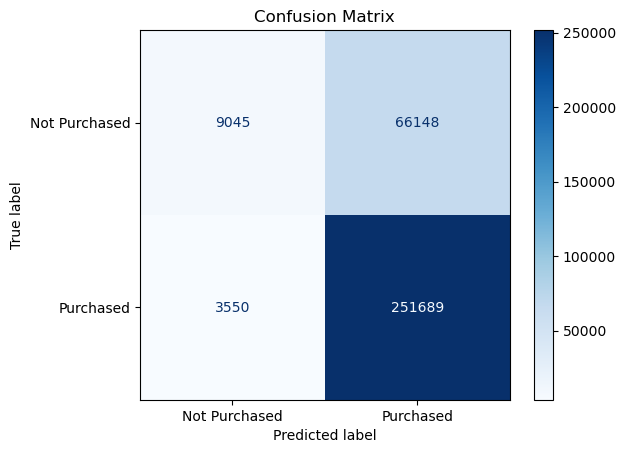

In [11]:
import numpy as np
import tensorflow as tf
import random
SEED = 503


np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    Dense(32, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

# Compile the mode
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.3)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Purchased', 'Purchased'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# KNN Classification----------------------------

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the y variable and X variables
y = nn_3['steam_purchase']
X = nn_3.drop(columns=['steam_purchase'])


In [13]:
# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



In [14]:
# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Default is 5 neighbors
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [15]:
# Make predictions
y_pred = knn.predict(X_test)



In [16]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 13988  61091]
 [ 19292 236061]]

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.19      0.26     75079
           1       0.79      0.92      0.85    255353

    accuracy                           0.76    330432
   macro avg       0.61      0.56      0.56    330432
weighted avg       0.71      0.76      0.72    330432


Accuracy Score:
0.7567336093356576


# Decision Tree----------------------------------------------------------------------------------

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [32]:
X = nn_3.drop(columns=['steam_purchase'])
y = nn_3['steam_purchase']


In [33]:
# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



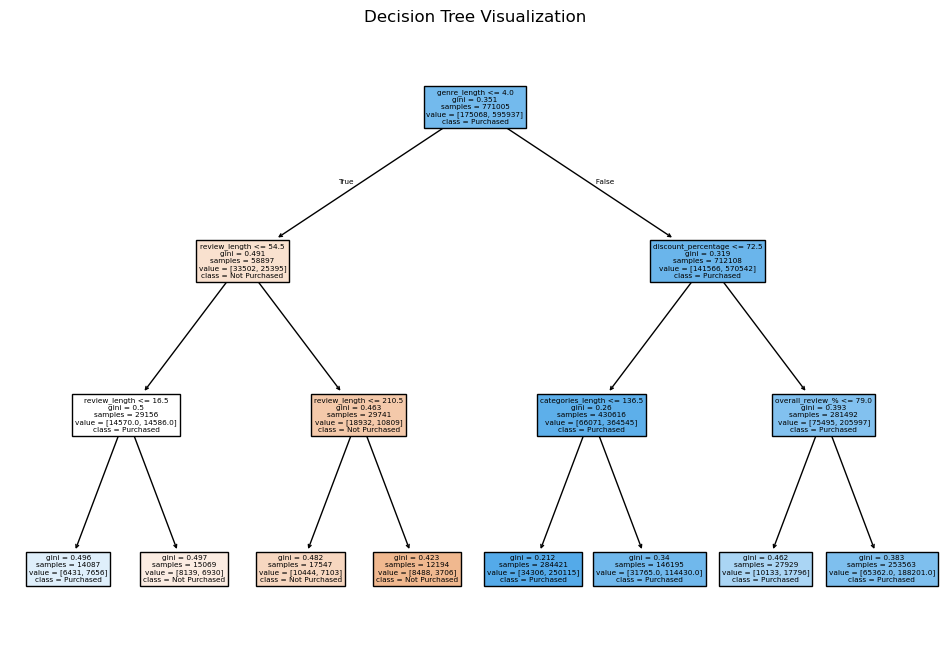

Test Accuracy: 0.788694799535154
|--- genre_length <= 4.00
|   |--- review_length <= 54.50
|   |   |--- review_length <= 16.50
|   |   |   |--- class: 1
|   |   |--- review_length >  16.50
|   |   |   |--- class: 0
|   |--- review_length >  54.50
|   |   |--- review_length <= 210.50
|   |   |   |--- class: 0
|   |   |--- review_length >  210.50
|   |   |   |--- class: 0
|--- genre_length >  4.00
|   |--- discount_percentage <= 72.50
|   |   |--- categories_length <= 136.50
|   |   |   |--- class: 1
|   |   |--- categories_length >  136.50
|   |   |   |--- class: 1
|   |--- discount_percentage >  72.50
|   |   |--- overall_review_% <= 79.00
|   |   |   |--- class: 1
|   |   |--- overall_review_% >  79.00
|   |   |   |--- class: 1



In [46]:
# Create and fit the Decision Tree model with custom parameters
decision_tree = DecisionTreeClassifier(
    random_state=503, 
    max_depth=3, 
    min_samples_split=8000, 
    min_samples_leaf=12000,
    criterion='gini'  # or 'entropy'
)
decision_tree.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(
    decision_tree, 
    feature_names=X.columns, 
    class_names=['Not Purchased', 'Purchased'], 
    filled=True
)
plt.title("Decision Tree Visualization")
plt.show()

from sklearn.tree import export_text

# Export the decision tree as a text-based description
tree_rules = export_text(decision_tree, feature_names=list(X.columns))


# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


# Print the rules
print(tree_rules)

# Random Forest------------------------------------------------------------------------------

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [26]:
# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [28]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 12516  62677]
 [ 11363 243876]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.17      0.25     75193
           1       0.80      0.96      0.87    255239

    accuracy                           0.78    330432
   macro avg       0.66      0.56      0.56    330432
weighted avg       0.73      0.78      0.73    330432


Accuracy Score: 0.7759296920395119


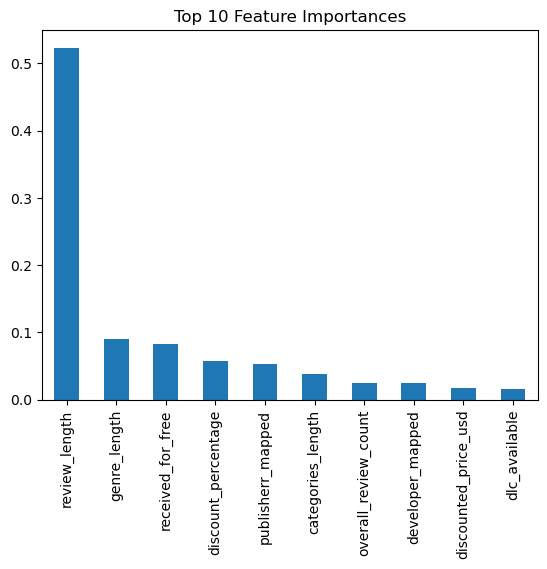

recommended                    0.011696
received_for_free              0.082808
written_during_early_access    0.006154
discount_percentage            0.056907
dlc_available                  0.015893
age_rating                     0.006170
win_support                    0.000000
mac_support                    0.004674
linux_support                  0.012403
awards                         0.007279
overall_review_%               0.014562
overall_review_count           0.024131
original_price_usd             0.011339
discounted_price_usd           0.017212
review_length                  0.523395
genre_length                   0.090691
categories_length              0.038025
developer_mapped               0.024005
publisherr_mapped              0.052230
over_50                        0.000425
dtype: float64

In [30]:
# Feature Importance
import matplotlib.pyplot as plt
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Feature Importances')
plt.show()

feature_importances